In [235]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define the time range
hours = np.arange(8*60-1, 22*60) / 60.0

# Define the rates of change for each variable (modify these as needed)
faim_rate_slider = widgets.FloatSlider(value=10, min=-25, max=25, step=0.01, description='Faim Rate:')
soif_rate_slider = widgets.FloatSlider(value=10, min=-25, max=25, step=0.01, description='Soif Rate:')
vessie_rate_slider = widgets.FloatSlider(value=7, min=-25, max=25, step=0.01, description='Vessie Rate:')
confort_rate_slider = widgets.FloatSlider(value=0, min=-25, max=25, step=0.01, description='Confort Rate:')
hygiene_rate_slider = widgets.FloatSlider(value=-5, min=-25, max=25, step=0.01, description='Hygiene Rate:')
plaisir_rate_slider = widgets.FloatSlider(value=-6, min=-25, max=25, step=0.01, description='Plaisir Rate:')

In [236]:
def run_simulation(faim_events,soif_events,vessie_events,confort_events,hygiene_events,plaisir_events):
    # Update rates with slider values
    faim_rate = faim_rate_slider.value/60
    soif_rate = soif_rate_slider.value/60
    vessie_rate = vessie_rate_slider.value/60
    confort_rate = confort_rate_slider.value/60
    hygiene_rate = hygiene_rate_slider.value/60
    plaisir_rate = plaisir_rate_slider.value/60

    # Initialize starting values
    faim = [90]
    soif = [90]
    vessie = [90]
    confort = [50]
    hygiene = [60]
    plaisir = [50]
    well_being = []

    # Define weights for each attribute
    weights = {
        "Faim": 0.15,
        "Soif": 0.20,
        "Vessie": 0.15,
        "Confort": 0.05,
        "Hygiène": 0.20,
        "Plaisir": 0.25
    }

    # Define a function to get the event amount for a given hour
    def get_event_amount(hour, event_dict):
        return event_dict.get(hour, 0)  # Returns 0 if no event for the given hour

    # Initial WellBeing calculation
    well_being.append((100 - faim[0]) * weights["Faim"] + 
                      (100 - soif[0]) * weights["Soif"] + 
                      (100 - vessie[0]) * weights["Vessie"] + 
                      confort[0] * weights["Confort"] + 
                      hygiene[0] * weights["Hygiène"] + 
                      plaisir[0] * weights["Plaisir"])

    # Calculate values for each hour (with events integrated)
    for i in range(1, len(hours)):
        faim.append(max(0, min(100, faim[i-1] + faim_rate + get_event_amount(hours[i], faim_events))))
        soif.append(max(0, min(100, soif[i-1] + soif_rate + get_event_amount(hours[i], soif_events))))
        vessie.append(max(0, min(100, vessie[i-1] + vessie_rate + get_event_amount(hours[i], vessie_events))))
        confort.append(max(0, min(100, confort[i-1] + confort_rate + get_event_amount(hours[i], confort_events))))
        hygiene.append(max(0, min(100, hygiene[i-1] + hygiene_rate + get_event_amount(hours[i], hygiene_events))))
        plaisir.append(max(0, min(100, plaisir[i-1] + plaisir_rate + get_event_amount(hours[i], plaisir_events))))

        # Update WellBeing for each hour
        well_being.append((100 - faim[i]) * weights["Faim"] + 
                          (100 - soif[i]) * weights["Soif"] + 
                          (100 - vessie[i]) * weights["Vessie"] + 
                          confort[i] * weights["Confort"] + 
                          hygiene[i] * weights["Hygiène"] + 
                          plaisir[i] * weights["Plaisir"])
        
    # Setup the subplot layout: 2 row, 1 columns
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 8))
    fig.set_size_inches(13,8)
    
    # Plot Personne variables on the first subplot
    ax1.set_title("Personne variables over time")
    ax1.plot(hours, faim, label="Faim")
    ax1.plot(hours, soif, label="Soif")
    ax1.plot(hours, vessie, label="Vessie")
    ax1.plot(hours, confort, label="Confort")
    ax1.plot(hours, hygiene, label="Hygiène")
    ax1.plot(hours, plaisir, label="Plaisir")
    ax1.set_xlabel("Hours")
    ax1.set_ylabel("Value")
    ax1.set_ylim([0, 100])
    ax1.legend()
    ax1.grid(True)

    # Plot WellBeing variable on the second subplot
    ax2.set_title("WellBeing over time")
    ax2.plot(hours, well_being, label="WellBeing", color='purple')
    ax2.hlines(30,8,22, label="Baseline", color='red')
    ax2.set_xlabel("Hours")
    ax2.set_ylabel("WellBeing Score")
    ax2.set_ylim([0, 100])
    ax2.legend()
    ax2.grid(True)
    
    # Show the plots
    #display(faim_rate_slider, soif_rate_slider, vessie_rate_slider, confort_rate_slider, hygiene_rate_slider, plaisir_rate_slider, run_button)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

## Sunny day scenario

In [237]:
# Define events as dictionaries with hour as key and bonus/malus value as value
# You can add widgets to control these values later if needed
hygiene_events1 = {8.5: 20.0, 16: 20, 18.5: 20.0, 20: 20, 21: 50}
vessie_events1 = {8: -70,14: -70, 21: -70}
faim_events1 = {8: -70, 12: -70, 18: -70}
soif_events1 = {8: -70, 12: -70, 18: -70}
confort_events1 = {}
plaisir_events1 = {10: 10, 12: 5, 14: 10, 18: 5, 21: 20}


## Base Case Scenario

In [238]:
# Define events as dictionaries with hour as key and bonus/malus value as value
# You can add widgets to control these values later if needed
hygiene_events2 = {8.5: 20.0, 20: 20, 21: 50}
vessie_events2 = {8: -70, 14: -70, 21: -70}
faim_events2 = {8: -70, 12: -70, 18: -70}
soif_events2 = {8.5: -70, 12.5: -70, 18.5: -70}
confort_events2 = {}
plaisir_events2 = {12: 5, 14: 10, 18: 5, 21: 20}

## Bear Case Scenario

In [239]:
# Define events as dictionaries with hour as key and bonus/malus value as value
# You can add widgets to control these values later if needed
hygiene_events3 = {15: 60}
vessie_events3 = {11: -70}
faim_events3 = {12: -70}
soif_events3 = {13: -70}
confort_events3 = {8: 70}
plaisir_events3 = {15: 30}

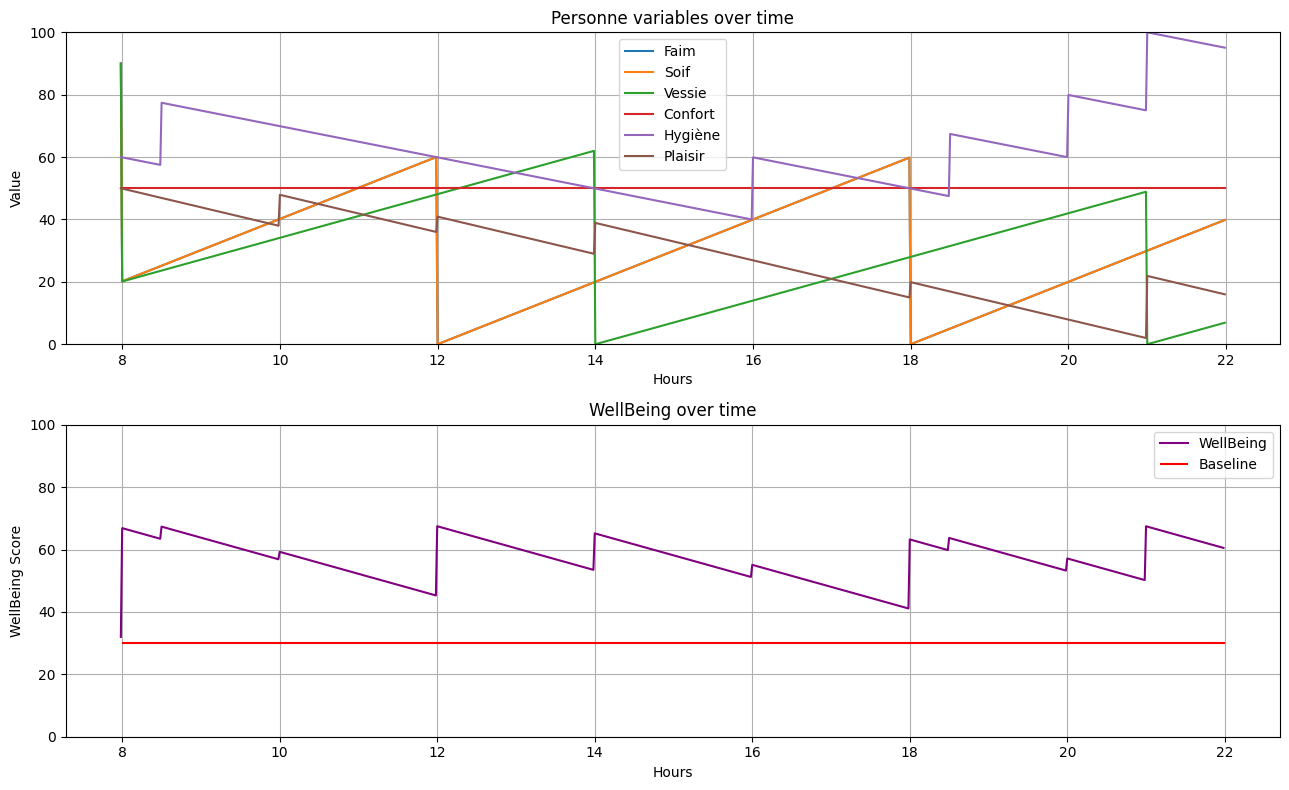

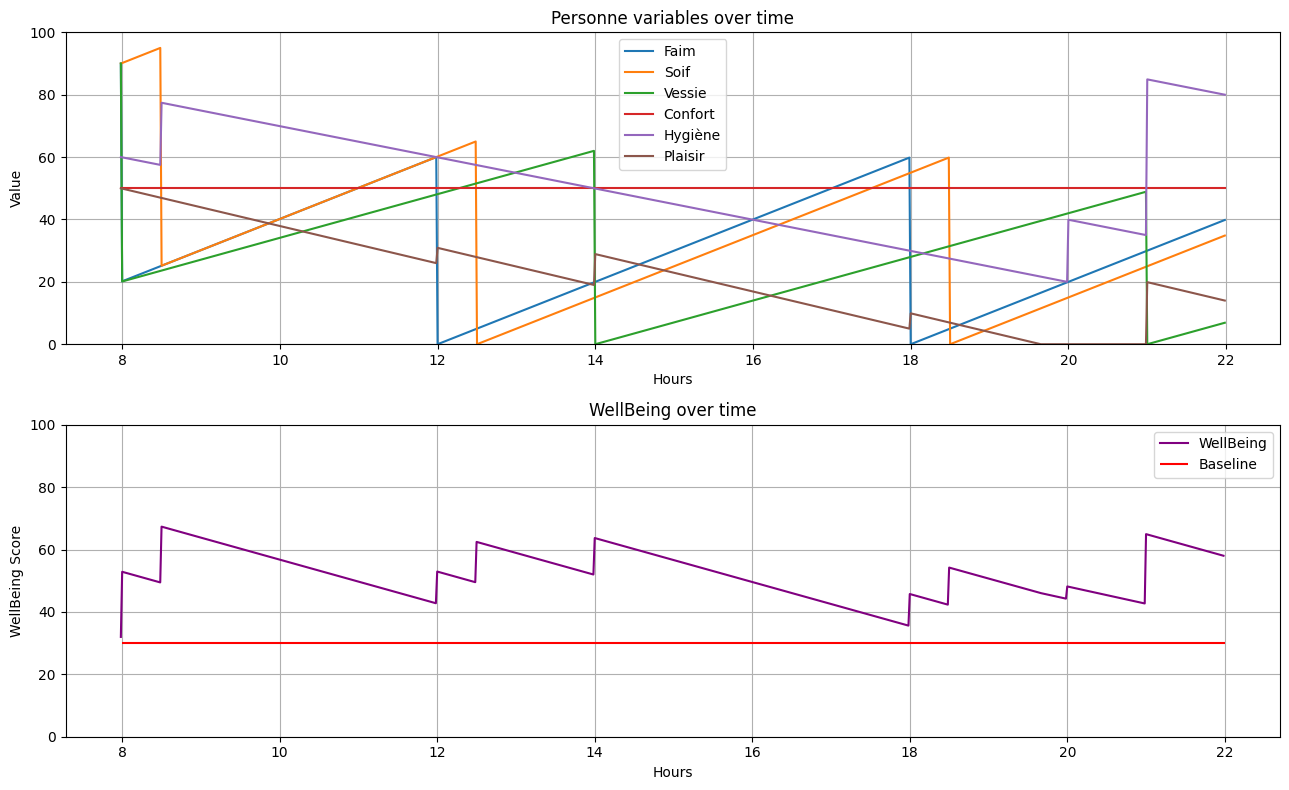

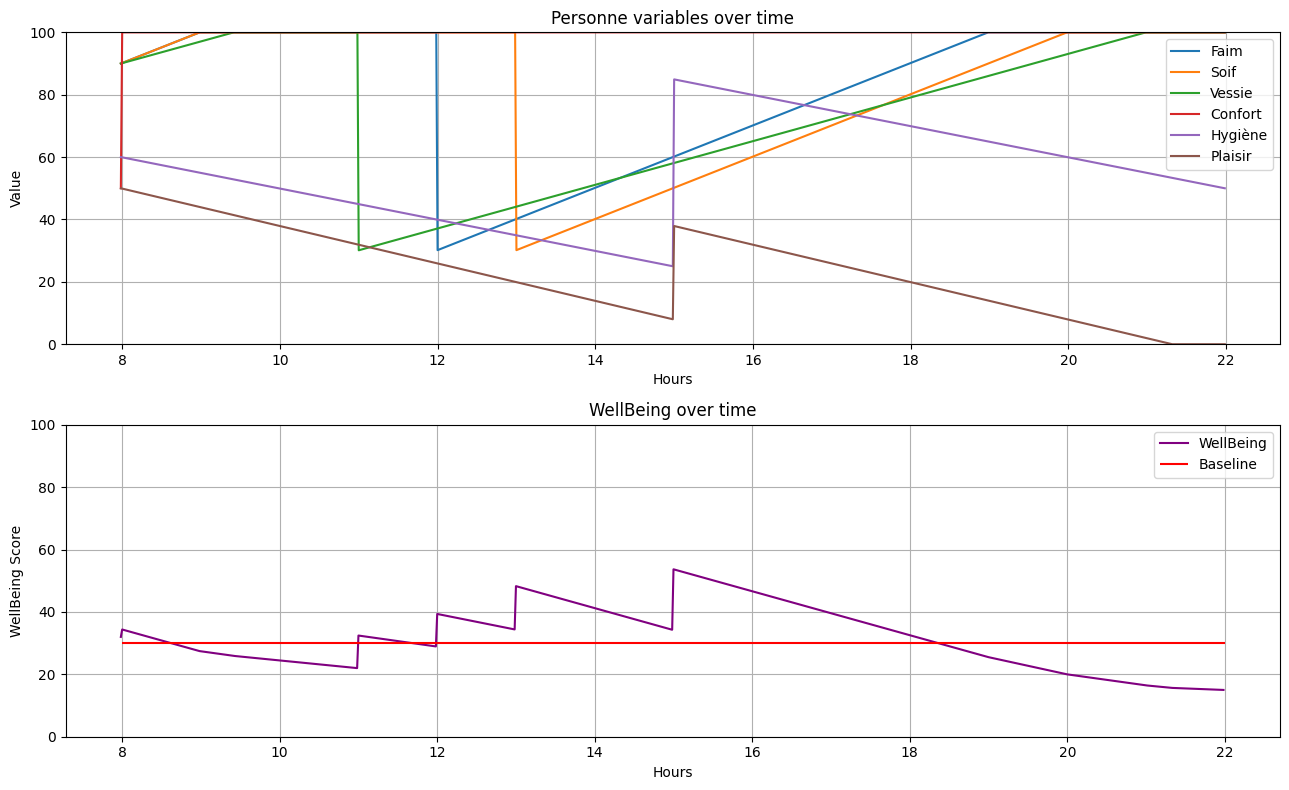

In [240]:
# Create a button to run the simulation
#run_button = widgets.Button(description='Run Simulation')

# Display the UI components
run_simulation(faim_events1,soif_events1,vessie_events1,confort_events1,hygiene_events1,plaisir_events1)
run_simulation(faim_events2,soif_events2,vessie_events2,confort_events2,hygiene_events2,plaisir_events2)
run_simulation(faim_events3,soif_events3,vessie_events3,confort_events3,hygiene_events3,plaisir_events3)
#display(faim_rate_slider, soif_rate_slider, vessie_rate_slider, confort_rate_slider, hygiene_rate_slider, plaisir_rate_slider, run_button)